# Comparison of predictive features between the single- and multi-center RPN signature
- This jupyter notebook is available on-line at:
  - https://github.com/spisakt/RPN-signature/blob/master/notebooks/2_feature_analysis.ipynb
- Input data for the notebook and non-standard code (PAINTeR library) is available in the repo:
  - https://github.com/spisakt/RPN-signature
- Raw MRI-data from study-centers 1 and 2 are available on OpenNeuro:
  - https://openneuro.org/datasets/ds002608/versions/1.0.1
  - https://openneuro.org/datasets/ds002609/versions/1.0.3
- Raw data from center 3 is available upon reasonable request.

## Imports

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.connectome import vec_to_sym_matrix, sym_matrix_to_vec

import sys
sys.path.append('../')
from PAINTeR import plot # in-house lib used for the RPN-signature

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load behavioral data

In [2]:
# load data
df_bochum = pd.read_csv("../res/bochum_sample_excl.csv")
df_essen = pd.read_csv("../res/essen_sample_excl.csv")
df_szeged = pd.read_csv("../res/szeged_sample_excl.csv")
df_bochum['study']='bochum'
df_essen['study']='essen'
df_szeged['study']='szeged'
df=pd.concat((df_bochum, df_essen, df_szeged), sort=False)
df=df.reset_index()
y = df.mean_QST_pain_sensitivity

## Load the saved final multi-center model

In [3]:
# load the RPN-signature (trained on sample 1):
model_multi_center = joblib.load('../res/multi-center/finalized_model_combat_multi-center.joblib') 

### function to extract predictive weights

In [4]:
#get region names from an arbitrary timeseries file
ts = pd.read_csv('../data/bochum-sample/regional_timeseries/bochum-023_pumi-17-scrubbed.tsv').iloc[:,1:] 
labels=ts.columns.values
l = pd.read_csv('../data/atlas_relabeled.tsv', sep="\t")
modules=np.insert(l['modules'].values, 0, "GlobSig")

# function to extract predictive weights:
def get_weights(model, labels=labels, modules=modules):
    RES = np.zeros(int(len(labels)*(len(labels)-1)/2))

    featuremask = model.named_steps['fsel'].get_support()
    RES[featuremask] = model.named_steps['model'].coef_
    
    print(np.sum(model.named_steps['model'].coef_!=0))
    
    RES_MAT = vec_to_sym_matrix(RES, diagonal=np.repeat(0, len(labels)))
    return RES_MAT
    

### plot the predictive network

In [5]:
#plot.plot_matrix(get_weights(model_multi_center)!=0, labels, modules)

## Load the weights of the RPN-siganture

In [6]:
rpn_conns = pd.read_csv("../res/predictive_connections.csv")
rpn_conns['abs_weight'] = rpn_conns['weight'].abs()
rpn_conns = rpn_conns.sort_values('abs_weight', ascending=False)
rpn_conns = rpn_conns.reset_index()
rpn_conns

,index,Unnamed: 0,idx_A,idx_B,mod_A,mod_B,reg_A,reg_B,weight,abs_weight
0,15,15,88,95,3_VATTnet_SALnet_BG_THAL,3_VATTnet_SALnet_BG_THAL,PUT_p,STgyr_p,0.270232,0.270232
1,5,5,15,45,1_CER,5_FPnet_VISDN,CER5,FP,0.245274,0.245274
2,1,1,1,99,1_CER,3_VATTnet_SALnet_BG_THAL,CER6_p,PSMcor_p,-0.200617,0.200617
3,7,7,16,85,1_CER,6_MOTnet,R_CERCR2_a,MOTnet_l,0.149634,0.149634
4,14,14,82,114,6_MOTnet,8_VISnet,MOTnet_m,MVISnet_p,-0.102468,0.102468
5,20,20,121,122,8_VISnet,8_VISnet,LVISnet_DP,VVISnet_m,0.094911,0.094911
6,0,0,0,34,2_MEAN_GM,7_DMnet,aMEAN_GM,L_IPlob,-0.086423,0.086423
7,18,18,96,116,3_VATTnet_SALnet_BG_THAL,8_VISnet,CAUDN_v,LVISnet_p,0.085078,0.085078
8,12,12,67,118,4_LIMnet,8_VISnet,CAUDNH_NACC,PVISnet_vm,-0.072571,0.072571
9,13,13,68,84,4_LIMnet,6_MOTnet,COLsul,MOTnet_vl,-0.062491,0.062491


In [7]:
#create a similar table from the multi-center signsature
RES_MAT = get_weights(model_multi_center)

df = pd.DataFrame(RES_MAT, columns=labels, index=labels)

idx = np.transpose(np.nonzero(np.triu(RES_MAT, k=1)))
print("Number of predictive connections:" + str(len(idx)))

lab = labels
#mod = modules
# hack for visulaization order
mod = np.array(['2_MEAN_GM',
'1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER',
 '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '1_CER', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet',
 '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet',
 '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet', '7_DMnet',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN',
 '5_FPnet_VISDN', '5_FPnet_VISDN', '5_FPnet_VISDN', '4_LIMnet', '4_LIMnet', '4_LIMnet',
 '4_LIMnet', '4_LIMnet', '4_LIMnet', '4_LIMnet', '4_LIMnet', '4_LIMnet', '4_LIMnet', '4_LIMnet',
 '4_LIMnet', '6_MOTnet', '6_MOTnet', '6_MOTnet', '6_MOTnet', '6_MOTnet', '6_MOTnet', '6_MOTnet',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL',
 '3_VATTnet_SALnet_BG_THAL', '3_VATTnet_SALnet_BG_THAL', '8_VISnet', '8_VISnet',
 '8_VISnet', '8_VISnet', '8_VISnet', '8_VISnet', '8_VISnet', '8_VISnet', '8_VISnet', '8_VISnet',
 '8_VISnet', '8_VISnet', '8_VISnet'])

#hack: rename for visualization order

multi_center_conns = pd.DataFrame( {'idx_A': idx[:,0],
                   'reg_A': lab[np.array(idx[:,0])],
                   'mod_A': mod[np.array(idx[:,0])],
                   'idx_B': idx[:,1],
                   'reg_B': lab[np.array(idx[:,1])],
                   'mod_B': mod[np.array(idx[:,1])],
                   'multi-center': RES_MAT[np.nonzero(np.triu(RES_MAT, k=1))].flatten()})


#table.to_csv(global_vars._RES_PRED_CONN_)
multi_center_conns['abs_multi-center'] = multi_center_conns['multi-center'].abs()
#table = table.sort_values('abs_multi-center', ascending=False)
#table = table.reset_index()
multi_center_conns

31
Number of predictive connections:31


,idx_A,reg_A,mod_A,idx_B,reg_B,mod_B,multi-center,abs_multi-center
0,0,GlobSig,2_MEAN_GM,19,VMPFcor_p,7_DMnet,0.104911,0.104911
1,1,CER6_p,1_CER,99,PSMcor_p,3_VATTnet_SALnet_BG_THAL,-0.080330,0.080330
2,3,R_CERCR2_p,1_CER,82,MOTnet_m,6_MOTnet,-0.027575,0.027575
3,6,L_CERCR2_a,1_CER,56,L_IFsul,5_FPnet_VISDN,-0.039034,0.039034
4,9,CER7b_m,1_CER,107,PCcor.1,3_VATTnet_SALnet_BG_THAL,0.040663,0.040663
5,9,CER7b_m,1_CER,114,MVISnet_p,8_VISnet,0.071035,0.071035
6,14,CER6_d,1_CER,82,MOTnet_m,6_MOTnet,-0.064479,0.064479
7,15,CER5,1_CER,45,FP,5_FPnet_VISDN,0.103640,0.103640
8,16,R_CERCR2_a,1_CER,85,MOTnet_l,6_MOTnet,0.104155,0.104155
9,16,R_CERCR2_a,1_CER,114,MVISnet_p,8_VISnet,-0.114222,0.114222


### some table transformations

In [8]:
rpn_conns['single-study']=rpn_conns['weight']
rpn_conns['connectivity'] = rpn_conns.reg_A.str.cat(' - ' + rpn_conns.reg_B).values
#rpn_conns = rpn_conns.set_index('connectivity', drop=)


multi_center_conns['connectivity'] = multi_center_conns.reg_A.str.cat(' - ' + multi_center_conns.reg_B).values
#table = table.set_index('connectivity', drop=False)

allconns=rpn_conns.merge(multi_center_conns, how='outer').iloc[:, 2:]
rpnonly=allconns[~allconns.weight.isna()].copy()

rpnonly['connectivity'] = rpnonly.reg_A.str.cat(' - ' + rpnonly.reg_B).values
rpnonly['abs_multi-center'] = rpnonly['multi-center'].abs()
rpnonly = rpnonly.sort_values('abs_multi-center', ascending=False)
rpnonly = rpnonly.reset_index()

#pd.wide_to_long(rpnonly[['connectivity', 'wrpn', 'wmulticenter']], "w", i="connectivity", j='model')
rpnonly_melt = pd.melt(rpnonly[['connectivity', 'single-study', 'multi-center']], id_vars=['connectivity'],
                       value_vars=['single-study', 'multi-center'], var_name='model')

intersection = rpnonly.dropna()

intersection_melt = pd.melt(intersection[['connectivity', 'single-study', 'multi-center']], id_vars=['connectivity'],
                       value_vars=['single-study', 'multi-center'], var_name='model')

intersection_melt

,connectivity,model,value
0,R_CERCR2_a - MOTnet_l,single-study,0.149634
1,CER5 - FP,single-study,0.245274
2,CER6_p - PSMcor_p,single-study,-0.200617
3,PUT_p - STgyr_p,single-study,0.270232
4,R_CERCR2_a - MOTnet_l,multi-center,0.104155
5,CER5 - FP,multi-center,0.103640
6,CER6_p - PSMcor_p,multi-center,-0.080330
7,PUT_p - STgyr_p,multi-center,0.047596


## Plot shared connections

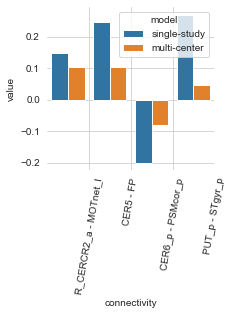

In [9]:
colors = ["tab:blue", "tab:orange"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(3, 3))
sns.barplot(data=intersection_melt, x='connectivity', y='value', hue='model')
plt.xticks(rotation=80)
plt.grid(True)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.xticks([x-0.5 for x in range(1,5, 1)] )
plt.savefig('../res/multi-center/barplot_combat.pdf')  

## Plot venn-diagrams

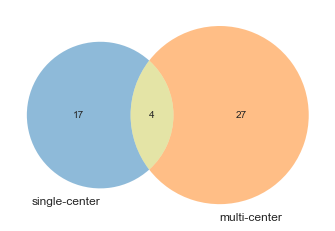

In [44]:
from matplotlib_venn import venn2

n_rpn = len(rpn_conns)
n_mc = len(multi_center_conns)
n_intersection = len(rpnonly.dropna())

# Use the venn2 function
v=venn2(subsets = (n_rpn - n_intersection,
                 n_mc - n_intersection,
                 n_intersection), set_labels = ('single-center', 'multi-center'))
v.get_patch_by_id('10').set_color('tab:blue')
v.get_patch_by_id('01').set_color('tab:orange')
v.get_patch_by_id('11').set_color('tab:olive')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('01').set_alpha(0.5)
plt.savefig('../res/multi-center/venn_num_conns_combat.pdf')  

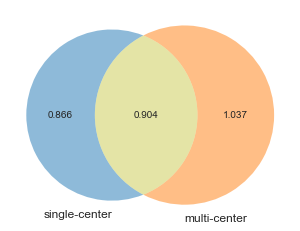

In [11]:
from matplotlib_venn import venn2

w_rpn = rpnonly['single-study'].abs().sum()
w_mc = multi_center_conns['multi-center'].abs().sum()
w_intersection = w_rpn - rpnonly.dropna()['single-study'].abs().sum()

# Use the venn2 function
v=venn2(subsets = (np.round(w_rpn - w_intersection, 3),
                 np.round(w_mc - w_intersection, 3),
                 np.round(w_intersection, 3)
                 ),
      set_labels = ('single-center', 'multi-center'))
v.get_patch_by_id('10').set_color('tab:blue')
v.get_patch_by_id('01').set_color('tab:orange')
v.get_patch_by_id('11').set_color('tab:olive')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('01').set_alpha(0.5)
plt.savefig('../res/multi-center/venn_num_weights_combat.pdf')  

True


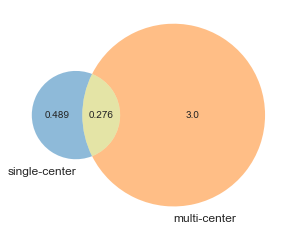

In [12]:
from matplotlib_venn import venn2

w_rpn = rpnonly['single-study'].abs().sum()
w_mc = multi_center_conns['multi-center'].abs().sum() 
w_intersection_rpn = rpnonly.dropna()['single-study'].abs().sum() / w_rpn
w_intersection_mc = rpnonly.dropna()['multi-center'].abs().sum() / w_mc
w_mc_norm = w_intersection_rpn * w_mc / w_intersection_mc

print(w_intersection_mc / w_mc == w_intersection_rpn / w_mc_norm)

# Use the venn2 function
v=venn2(subsets = (np.round((w_rpn - w_intersection) / w_rpn, 3),
                 np.round((w_mc_norm - w_intersection_rpn) / w_rpn, 0),
                 np.round(w_intersection_rpn / w_rpn, 3)
                 ),
      set_labels = ('single-center', 'multi-center'))
v.get_patch_by_id('10').set_color('tab:blue')
v.get_patch_by_id('01').set_color('tab:orange')
v.get_patch_by_id('11').set_color('tab:olive')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('01').set_alpha(0.5)
plt.savefig('../res/multi-center/venn_num_weights_combat.pdf')  

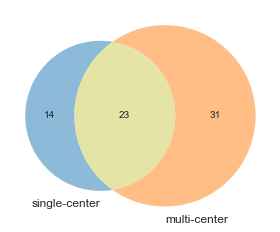

In [13]:
regs_rpn = len(np.unique(np.hstack((rpn_conns.reg_A.values, rpn_conns.reg_B.values)) )) # 37/122
regs_mc = len(np.unique(np.hstack((multi_center_conns.reg_A.values, multi_center_conns.reg_B.values)) )) #87/122
regs_union = len(np.unique(np.hstack((rpn_conns.reg_A.values, rpn_conns.reg_B.values,
           multi_center_conns.reg_A.values, multi_center_conns.reg_B.values)) ))
regs_intersection = regs_rpn + regs_mc - regs_union

v=venn2(subsets = (regs_rpn-regs_intersection,
                 regs_mc-regs_intersection,
                 regs_intersection
                 ),
      set_labels = ('single-center', 'multi-center'))
v.get_patch_by_id('10').set_color('tab:blue')
v.get_patch_by_id('01').set_color('tab:orange')
v.get_patch_by_id('11').set_color('tab:olive')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('01').set_alpha(0.5)
plt.savefig('../res/multi-center/venn_num_regions_combat.pdf')  

## Create large-scale network level summaries

In [14]:
module_names = np.unique(mod)
# creeate modular matrix:
rpn_matrix_pos = pd.DataFrame(data=np.zeros((len(module_names), len(module_names))), columns=module_names, index=module_names)
rpn_matrix_neg = pd.DataFrame(data=np.zeros((len(module_names), len(module_names))), columns=module_names, index=module_names)

conns_rpn=pd.DataFrame(columns=['reg_A', 'reg_B', 'mod_A', 'mod_B', 'weight'])

for i in range(len(rpn_conns)):
    if rpn_conns['weight'][i] > 0:
        rpn_matrix_pos.loc[rpn_conns.mod_A[i], rpn_conns.mod_B[i]] += rpn_conns['weight'][i]
        rpn_matrix_pos.loc[rpn_conns.mod_B[i], rpn_conns.mod_A[i]] += rpn_conns['weight'][i]

        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'mod_A'] = rpn_conns.mod_A[i]
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'mod_B'] = rpn_conns.mod_B[i]
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'reg_A'] = rpn_conns.mod_A[i] + '_pos'
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'reg_B'] = rpn_conns.mod_B[i] + '_pos'
        
        if np.isnan(conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'weight']):
            conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'weight'] = rpn_conns['weight'][i]
        else:
            conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_pos', 'weight'] += rpn_conns['weight'][i]
        
    if rpn_conns['weight'][i] < 0:
        rpn_matrix_neg.loc[rpn_conns.mod_A[i], rpn_conns.mod_B[i]] += rpn_conns['weight'][i]
        rpn_matrix_neg.loc[rpn_conns.mod_B[i], rpn_conns.mod_A[i]] += rpn_conns['weight'][i]
    
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'mod_A'] = rpn_conns.mod_A[i]
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'mod_B'] = rpn_conns.mod_B[i]
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'reg_A'] = rpn_conns.mod_A[i] + '_neg'
        conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'reg_B'] = rpn_conns.mod_B[i] + '_neg'
        if np.isnan(conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'weight']):
            conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'weight'] = rpn_conns['weight'][i]
        else:
            conns_rpn.loc[rpn_conns.mod_A[i] + rpn_conns.mod_B[i] + '_neg', 'weight'] += rpn_conns['weight'][i]

conns_rpn.to_csv('../res/multi-center/large-scale_conns_rpn_combat.csv')

In [15]:
module_names = np.unique(mod)
# creeate modular matrix:
mc_matrix_pos = pd.DataFrame(data=np.zeros((len(module_names), len(module_names))), columns=module_names, index=module_names)
mc_matrix_neg = pd.DataFrame(data=np.zeros((len(module_names), len(module_names))), columns=module_names, index=module_names)

conns_mc=pd.DataFrame(columns=['reg_A', 'reg_B','mod_A', 'mod_B', 'weight'])

for i in range(len(multi_center_conns)):
    if multi_center_conns['multi-center'][i] > 0:
        mc_matrix_pos.loc[multi_center_conns.mod_A[i], multi_center_conns.mod_B[i]] += multi_center_conns['multi-center'][i]
        mc_matrix_pos.loc[multi_center_conns.mod_B[i], multi_center_conns.mod_A[i]] += multi_center_conns['multi-center'][i]

        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'mod_A'] = multi_center_conns.mod_A[i]
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'mod_B'] = multi_center_conns.mod_B[i]
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'reg_A'] = multi_center_conns.mod_A[i] + '_pos'
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'reg_B'] = multi_center_conns.mod_B[i] + '_pos'
        
        if np.isnan(conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'weight']):
            conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'weight'] = multi_center_conns['multi-center'][i]
        else:
            conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_pos', 'weight'] += multi_center_conns['multi-center'][i]
        
    if multi_center_conns['multi-center'][i] < 0:
        mc_matrix_neg.loc[multi_center_conns.mod_A[i], multi_center_conns.mod_B[i]] += multi_center_conns['multi-center'][i]
        mc_matrix_neg.loc[multi_center_conns.mod_B[i], multi_center_conns.mod_A[i]] += multi_center_conns['multi-center'][i]
    
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'mod_A'] = multi_center_conns.mod_A[i]
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'mod_B'] = multi_center_conns.mod_B[i]
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'reg_A'] = multi_center_conns.mod_A[i] + '_neg'
        conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'reg_B'] = multi_center_conns.mod_B[i] + '_neg'
        if np.isnan(conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'weight']):
            conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'weight'] = multi_center_conns['multi-center'][i]
        else:
            conns_mc.loc[multi_center_conns.mod_A[i] + multi_center_conns.mod_B[i] + '_neg', 'weight'] += multi_center_conns['multi-center'][i]
        
conns_mc.to_csv('../res/multi-center/large-scale_conns_multi-center_combat.csv')     

## Plot them as matrices

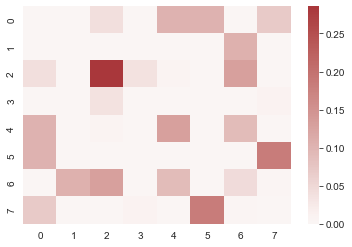

In [16]:
sns.heatmap(mc_matrix_pos.values, cmap="vlag", center=0)
plt.savefig('../res/multi-center/mat_mc_pos_combat.pdf')  

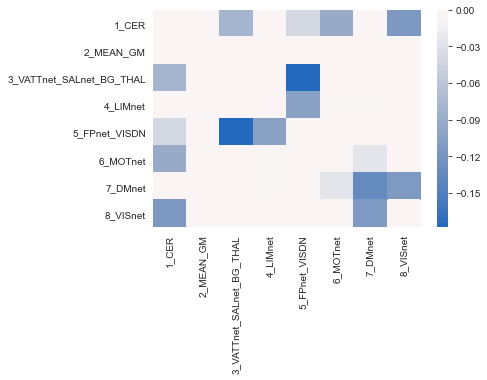

In [17]:
sns.heatmap(mc_matrix_neg, cmap="vlag", center=0)
plt.savefig('../res/multi-center/mat_mc_neg_combat.pdf')  

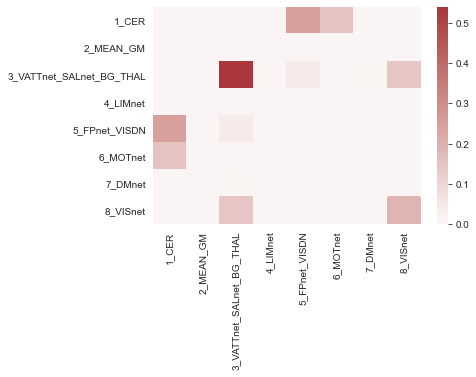

In [18]:
sns.heatmap(rpn_matrix_pos, cmap="vlag", center=0)
plt.savefig('../res/multi-center/mat_rpn_pos_combat.pdf')  

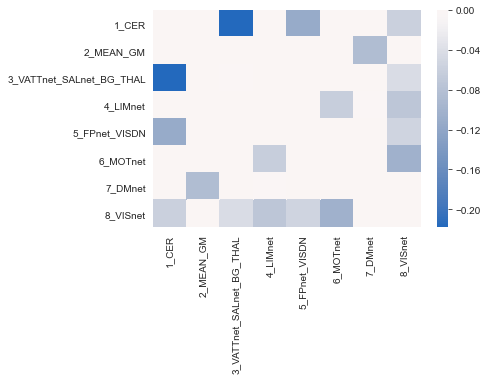

In [19]:
sns.heatmap(rpn_matrix_neg, cmap="vlag", center=0)
plt.savefig('../res/multi-center/mat_rpn_neg_combat.pdf')  

## Plot predictive coefficients summarized in large-scale modules

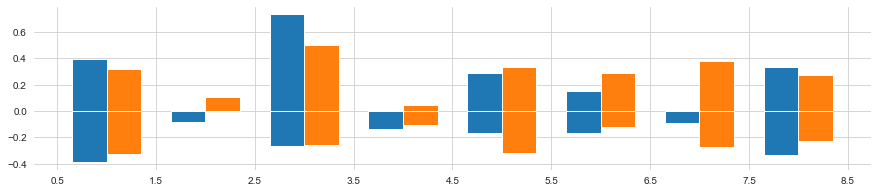

In [171]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 3)
x=np.array([1,2,3,4,5,6,7,8])
width=0.35
bar1pos=ax.bar(x - width/2, rpn_matrix_pos.sum(), width, label='single-center')
bar2pos=ax.bar(x + width/2, mc_matrix_pos.sum(), width, label='multi-center')

bar1neg=ax.bar(x - width/2, rpn_matrix_neg.sum(), width, label='single-center')
bar2neg=ax.bar(x + width/2, mc_matrix_neg.sum(), width, label='multi-center')
plt.grid(True)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.xticks([x-0.5 for x in range(1,10, 1)] )
plt.savefig('../res/multi-center/barplot_reg_combat.pdf') 

## Plot venn diagram for large-scale connectivity

In [41]:
np.sum(np.logical_and(np.triu((rpn_matrix_pos - rpn_matrix_neg).values) != 0,
                      np.triu((mc_matrix_pos - mc_matrix_neg).values) != 0))



12

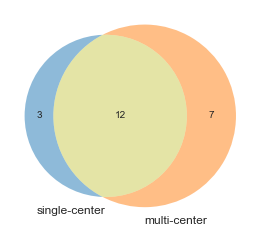

In [43]:
from matplotlib_venn import venn2

n_rpn = np.sum(np.triu((rpn_matrix_pos - rpn_matrix_neg).values) != 0)
n_mc = np.sum(np.triu((mc_matrix_pos - mc_matrix_neg).values) != 0)
n_intersection = np.sum(np.logical_and(np.triu((rpn_matrix_pos - rpn_matrix_neg).values) != 0,
                      np.triu((mc_matrix_pos - mc_matrix_neg).values) != 0))

# Use the venn2 function
v=venn2(subsets = (n_rpn - n_intersection,
                 n_mc - n_intersection,
                 n_intersection), set_labels = ('single-center', 'multi-center'))
v.get_patch_by_id('10').set_color('tab:blue')
v.get_patch_by_id('01').set_color('tab:orange')
v.get_patch_by_id('11').set_color('tab:olive')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')
v.get_patch_by_id('10').set_alpha(0.5)
v.get_patch_by_id('01').set_alpha(0.5)
plt.savefig('../res/multi-center/venn_num_conns_combat_large-scale.pdf')  

## plot summed negative and positive contributions of large-scale networks

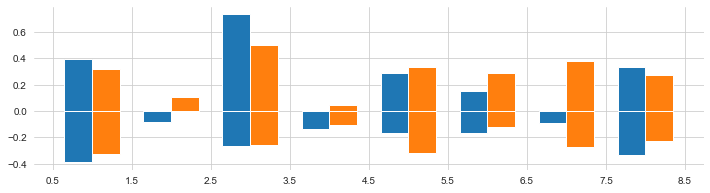

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)
x=np.array([1,2,3,4,5,6,7,8])
width=0.35
bar1pos=ax.bar(x - width/2, rpn_matrix_pos.sum(), width, label='single-center')
bar2pos=ax.bar(x + width/2, mc_matrix_pos.sum(), width, label='multi-center')

bar1neg=ax.bar(x - width/2, rpn_matrix_neg.sum(), width, label='single-center')
bar2neg=ax.bar(x + width/2, mc_matrix_neg.sum(), width, label='multi-center')
plt.grid(True)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.xticks([x-0.5 for x in range(1,10, 1)] )
plt.savefig('../res/multi-center/barplot_reg_combat.pdf') 

## Display all connectivities

In [122]:
pd.set_option("display.max_rows", None)
x=allconns[['idx_A', 'idx_B', 'mod_A', 'mod_B', 'reg_A', 'reg_B', 'single-study', 'multi-center']]
x['abs_mc'] = allconns['multi-center'].abs()
allconns

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,idx_A,idx_B,mod_A,mod_B,reg_A,reg_B,weight,abs_weight,single-study,connectivity,multi-center,abs_multi-center
0,88,95,3_VATTnet_SALnet_BG_THAL,3_VATTnet_SALnet_BG_THAL,PUT_p,STgyr_p,0.270232,0.270232,0.270232,PUT_p - STgyr_p,0.047596,0.047596
1,15,45,1_CER,5_FPnet_VISDN,CER5,FP,0.245274,0.245274,0.245274,CER5 - FP,0.103640,0.103640
2,1,99,1_CER,3_VATTnet_SALnet_BG_THAL,CER6_p,PSMcor_p,-0.200617,0.200617,-0.200617,CER6_p - PSMcor_p,-0.080330,0.080330
3,16,85,1_CER,6_MOTnet,R_CERCR2_a,MOTnet_l,0.149634,0.149634,0.149634,R_CERCR2_a - MOTnet_l,0.104155,0.104155
4,82,114,6_MOTnet,8_VISnet,MOTnet_m,MVISnet_p,-0.102468,0.102468,-0.102468,MOTnet_m - MVISnet_p,NaN,NaN
5,121,122,8_VISnet,8_VISnet,LVISnet_DP,VVISnet_m,0.094911,0.094911,0.094911,LVISnet_DP - VVISnet_m,NaN,NaN
6,0,34,2_MEAN_GM,7_DMnet,aMEAN_GM,L_IPlob,-0.086423,0.086423,-0.086423,aMEAN_GM - L_IPlob,NaN,NaN
7,96,116,3_VATTnet_SALnet_BG_THAL,8_VISnet,CAUDN_v,LVISnet_p,0.085078,0.085078,0.085078,CAUDN_v - LVISnet_p,NaN,NaN
8,67,118,4_LIMnet,8_VISnet,CAUDNH_NACC,PVISnet_vm,-0.072571,0.072571,-0.072571,CAUDNH_NACC - PVISnet_vm,NaN,NaN
9,68,84,4_LIMnet,6_MOTnet,COLsul,MOTnet_vl,-0.062491,0.062491,-0.062491,COLsul - MOTnet_vl,NaN,NaN


## Save finalized multi-center connections

In [22]:
multi_center_conns.to_csv('../res/multi-center/finalized_model_connections_combat.csv')

## predictive connections per center

In [150]:
from sklearn import preprocessing
X_harmonized = joblib.load('../res/multi-center/harmonized_features.joblib')
X_harmonized = preprocessing.RobustScaler().fit_transform(X_harmonized)

RES = np.zeros(int(len(labels)*(len(labels)-1)/2))

featuremask = model_multi_center.named_steps['fsel'].get_support()
RES[featuremask] = model_multi_center.named_steps['model'].coef_

*** PUT_p - STgyr_p study 1 ****************************************************
R=0.58
p_corr=0.00013
*** PUT_p - STgyr_p study 2 ****************************************************
R=0.28
p_corr=0.04662
*** PUT_p - STgyr_p study 3 ****************************************************
R=-0.10
p_corr=0.64350
*** CER5 - FP study 1 ****************************************************
R=0.57
p_corr=0.00025
*** CER5 - FP study 2 ****************************************************
R=0.31
p_corr=0.02962
*** CER5 - FP study 3 ****************************************************
R=0.25
p_corr=0.14538
*** CER6_p - PSMcor_p study 1 ****************************************************
R=-0.49
p_corr=0.99875
*** CER6_p - PSMcor_p study 2 ****************************************************
R=-0.27
p_corr=0.94363
*** CER6_p - PSMcor_p study 3 ****************************************************
R=-0.13
p_corr=0.70513
*** R_CERCR2_a - MOTnet_l study 1 ***********************************************

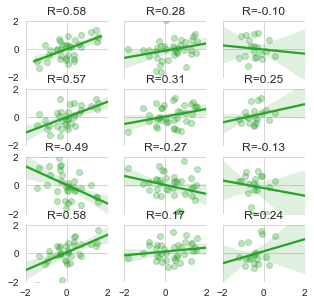

In [162]:
# load data
df_bochum = pd.read_csv("../res/bochum_sample_excl.csv")
df_essen = pd.read_csv("../res/essen_sample_excl.csv")
df_szeged = pd.read_csv("../res/szeged_sample_excl.csv")
df_bochum['study']='bochum'
df_essen['study']='essen'
df_szeged['study']='szeged'
df=pd.concat((df_bochum, df_essen, df_szeged), sort=False)
df=df.reset_index()
y = df.mean_QST_pain_sensitivity

study_masks = {
    "study 1" : (df.study == 'bochum').values,
    "study 2" : (df.study == 'essen').values,
    "study 3" : (df.study == 'szeged').values
    #"study 1+2+3" : np.array([True] * len(y))
}

from mlxtend.evaluate import permutation_test

conns = ["PUT_p - STgyr_p", "CER5 - FP", "CER6_p - PSMcor_p", "R_CERCR2_a - MOTnet_l"]

fig, axs = plt.subplots(ncols=3, nrows=len(conns), figsize=(5,1.2*len(conns)), sharex=True, sharey=True)

#cols = ['tab:blue', 'tab:orange']

for row, cv in enumerate(conns):
    for col, study in enumerate(study_masks.keys()):
        
        coef = allconns[allconns.connectivity==cv]['multi-center'].values
        idx=np.argwhere(RES==coef).flatten()
        
        g=sns.regplot(y[study_masks[study]].values, X_harmonized[:,idx].flatten()[study_masks[study]], ax=axs[row, col],
                    scatter=True, scatter_kws={'alpha':0.3}, color='tab:green')
        g.set(xlabel=None) 
        axs[row, col].set_xlim([-2, 2])
        axs[row, col].set_ylim([-2, 2])
        axs[row, col].spines['top'].set_visible(False)
        axs[row, col].spines['bottom'].set_visible(False)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['left'].set_visible(False)
        axs[row, col].grid(True)
        
        print('***', cv, study, '****************************************************')
                   
        corr = np.corrcoef(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values)[0,1]
        axs[row, col].title.set_text("R={:.2f}".format(corr))
        print("R={:.2f}".format(corr))
        
        # takes some seconds
        p_corr = permutation_test(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values,
                           func=lambda x, y: np.corrcoef(x, y)[0,1],
                           method='approximate',
                           num_rounds=8000,
                           seed=42)
        print("p_corr={:.5f}".format(p_corr))
   
        
plt.savefig('../res/multi-center/regplots_obs_conn_overlap.pdf')  

*** MOTnet_m - LVISnet_p study 1 ****************************************************
R=0.33
p_corr=0.02475
*** MOTnet_m - LVISnet_p study 2 ****************************************************
R=0.42
p_corr=0.00438
*** MOTnet_m - LVISnet_p study 3 ****************************************************
R=0.30
p_corr=0.11150
*** DMPFcor_ac - CAUDN_d study 1 ****************************************************
R=0.25
p_corr=0.06775
*** DMPFcor_ac - CAUDN_d study 2 ****************************************************
R=0.45
p_corr=0.00187
*** DMPFcor_ac - CAUDN_d study 3 ****************************************************
R=0.26
p_corr=0.14800
*** L_VLPFcor - SMgyr study 1 ****************************************************
R=-0.25
p_corr=0.92788
*** L_VLPFcor - SMgyr study 2 ****************************************************
R=-0.38
p_corr=0.99000
*** L_VLPFcor - SMgyr study 3 ****************************************************
R=-0.07
p_corr=0.58800
*** R_CERCR2_a - MVISnet_p study 1

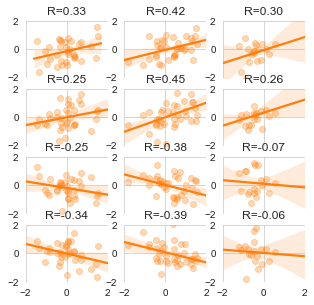

In [164]:
# load data
df_bochum = pd.read_csv("../res/bochum_sample_excl.csv")
df_essen = pd.read_csv("../res/essen_sample_excl.csv")
df_szeged = pd.read_csv("../res/szeged_sample_excl.csv")
df_bochum['study']='bochum'
df_essen['study']='essen'
df_szeged['study']='szeged'
df=pd.concat((df_bochum, df_essen, df_szeged), sort=False)
df=df.reset_index()
y = df.mean_QST_pain_sensitivity

study_masks = {
    "study 1" : (df.study == 'bochum').values,
    "study 2" : (df.study == 'essen').values,
    "study 3" : (df.study == 'szeged').values
}

from mlxtend.evaluate import permutation_test

conns = ["MOTnet_m - LVISnet_p", "DMPFcor_ac - CAUDN_d", "L_VLPFcor - SMgyr", "R_CERCR2_a - MVISnet_p"]

fig, axs = plt.subplots(ncols=3, nrows=len(conns), figsize=(5,1.2*len(conns)), sharex=True, sharey=False)

#cols = ['tab:blue', 'tab:orange']

for row, cv in enumerate(conns):
    for col, study in enumerate(study_masks.keys()):
        
        coef = allconns[allconns.connectivity==cv]['multi-center'].values
        idx=np.argwhere(RES==coef).flatten()
        
        g=sns.regplot(y[study_masks[study]].values, X_harmonized[:,idx].flatten()[study_masks[study]], ax=axs[row, col],
                    scatter=True, scatter_kws={'alpha':0.3}, color='tab:orange')
        g.set(xlabel=None) 
        axs[row, col].set_xlim([-2, 2])
        axs[row, col].set_ylim([-2, 2])
        axs[row, col].spines['top'].set_visible(False)
        axs[row, col].spines['bottom'].set_visible(False)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['left'].set_visible(False)
        axs[row, col].grid(True)
        
        print('***', cv, study, '****************************************************')
                   
        corr = np.corrcoef(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values)[0,1]
        axs[row, col].title.set_text("R={:.2f}".format(corr))
        print("R={:.2f}".format(corr))
        
        # takes some seconds
        p_corr = permutation_test(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values,
                           func=lambda x, y: np.corrcoef(x, y)[0,1],
                           method='approximate',
                           num_rounds=8000,
                           seed=42)
        print("p_corr={:.5f}".format(p_corr))
   
        
plt.savefig('../res/multi-center/regplots_obs_conn_mc.pdf')  

['MOTnet_m', 'MVISnet_p']
(7503,)
*** MOTnet_m - MVISnet_p study 1 ****************************************************
R=-0.52
p_corr=0.00125
['MOTnet_m', 'MVISnet_p']
(7503,)
*** MOTnet_m - MVISnet_p study 2 ****************************************************
R=-0.09
p_corr=0.58313
['MOTnet_m', 'MVISnet_p']
(7503,)
*** MOTnet_m - MVISnet_p study 3 ****************************************************
R=-0.20
p_corr=0.41663
['LVISnet_DP', 'VVISnet_m']
(7503,)
*** LVISnet_DP - VVISnet_m study 1 ****************************************************
R=0.52
p_corr=0.00162
['LVISnet_DP', 'VVISnet_m']
(7503,)
*** LVISnet_DP - VVISnet_m study 2 ****************************************************
R=-0.13
p_corr=0.42788
['LVISnet_DP', 'VVISnet_m']
(7503,)
*** LVISnet_DP - VVISnet_m study 3 ****************************************************
R=-0.03
p_corr=0.90350
['GlobSig', 'L_IPlob']
(7503,)
*** GlobSig - L_IPlob study 1 ****************************************************
R=-0.17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


p_corr=0.33213
['GlobSig', 'L_IPlob']
(7503,)
*** GlobSig - L_IPlob study 2 ****************************************************
R=-0.20


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


p_corr=0.24163
['GlobSig', 'L_IPlob']
(7503,)
*** GlobSig - L_IPlob study 3 ****************************************************
R=-0.03


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


p_corr=0.88087
['CAUDN_v', 'LVISnet_p']
(7503,)
*** CAUDN_v - LVISnet_p study 1 ****************************************************
R=0.49
p_corr=0.00275
['CAUDN_v', 'LVISnet_p']
(7503,)
*** CAUDN_v - LVISnet_p study 2 ****************************************************
R=-0.00
p_corr=0.98175
['CAUDN_v', 'LVISnet_p']
(7503,)
*** CAUDN_v - LVISnet_p study 3 ****************************************************
R=0.02
p_corr=0.94900


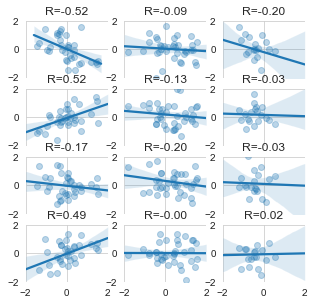

In [166]:
# load data
df_bochum = pd.read_csv("../res/bochum_sample_excl.csv")
df_essen = pd.read_csv("../res/essen_sample_excl.csv")
df_szeged = pd.read_csv("../res/szeged_sample_excl.csv")
df_bochum['study']='bochum'
df_essen['study']='essen'
df_szeged['study']='szeged'
df=pd.concat((df_bochum, df_essen, df_szeged), sort=False)
df=df.reset_index()
y = df.mean_QST_pain_sensitivity

study_masks = {
    "study 1" : (df.study == 'bochum').values,
    "study 2" : (df.study == 'essen').values,
    "study 3" : (df.study == 'szeged').values
}


from mlxtend.evaluate import permutation_test

conns = ["MOTnet_m - MVISnet_p", "LVISnet_DP - VVISnet_m", "GlobSig - L_IPlob", "CAUDN_v - LVISnet_p"]

fig, axs = plt.subplots(ncols=3, nrows=len(conns), figsize=(5,1.2*len(conns)), sharex=True, sharey=False)

#cols = ['tab:blue', 'tab:orange']

for row, cv in enumerate(conns):
    for col, study in enumerate(study_masks.keys()):
        
        coef = allconns[allconns.connectivity==cv]['single-study'].values
        idx=np.argwhere(RES==coef).flatten()
        
        EX_MAT = pd.DataFrame(vec_to_sym_matrix(np.zeros(int(len(labels)*(len(labels)-1)/2)),
                                        diagonal=np.repeat(0, len(labels))),
                      columns=labels, index=labels)
        regs = cv.split(' - ')
        print(regs)
        EX_MAT.loc[regs[0], regs[1]] = EX_MAT.loc[regs[1], regs[0]] = 1
        vec_mask = sym_matrix_to_vec(EX_MAT.values, discard_diagonal=True)
        print(vec_mask.shape)
        idx=np.argwhere(vec_mask==1)
        
        g=sns.regplot(y[study_masks[study]].values, X_harmonized[:,idx].flatten()[study_masks[study]], ax=axs[row, col],
                    scatter=True, scatter_kws={'alpha':0.3}, color='tab:blue')
        g.set(xlabel=None) 
        axs[row, col].set_xlim([-2, 2])
        axs[row, col].set_ylim([-2, 2])
        axs[row, col].spines['top'].set_visible(False)
        axs[row, col].spines['bottom'].set_visible(False)
        axs[row, col].spines['right'].set_visible(False)
        axs[row, col].spines['left'].set_visible(False)
        axs[row, col].grid(True)
        
        print('***', cv, study, '****************************************************')
                   
        corr = np.corrcoef(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values)[0,1]
        axs[row, col].title.set_text("R={:.2f}".format(corr))
        print("R={:.2f}".format(corr))
        
        # takes some seconds
        p_corr = permutation_test(X_harmonized[:,idx].flatten()[study_masks[study]], y[study_masks[study]].values,
                           func=lambda x, y: np.abs(np.corrcoef(x, y)[0,1]),
                           method='approximate',
                           num_rounds=8000,
                           seed=42)
        print("p_corr={:.5f}".format(p_corr))
   
        
plt.savefig('../res/multi-center/regplots_obs_conn_rpn.pdf')  